In [69]:
# Import libraries
import pandas as pd
import numpy as np
import ast
import re
import math
from geopy.geocoders import Nominatim

from IPython.display import Image 
from IPython.core.display import HTML 
from folium.plugins import FloatImage
import folium # plotting library

import matplotlib.pyplot as plt
import seaborn as sns

from plotly.offline import init_notebook_mode, plot, iplot
import plotly.graph_objs as go
import chart_studio.plotly as py
init_notebook_mode(connected=True)
%matplotlib inline

In [127]:
rest_df = pd.read_csv(r"/kaggle/input/zomato-bangalore-restaurants/zomato.csv", encoding='utf-8')

In [129]:
rest_df.shape

(51717, 17)

### **DATA CLEANING**

dealing with NAN values and removing unwanted data

In [131]:
# cleaning URLs, address, and Names
print(rest_df['url'].isnull().sum(), 
rest_df['address'].isnull().sum(), 
rest_df['name'].isnull().sum())

0 0 0


In [132]:
rest_df['online_order'].unique()

array(['Yes', 'No'], dtype=object)

In [133]:
rest_df['book_table'].unique()

array(['Yes', 'No'], dtype=object)

In [134]:
rest_df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [135]:
# removing all non essential rows with invalid ratings

values_to_delete = ['NEW', np.nan, '-']
rest_df = rest_df[~rest_df['rate'].isin(values_to_delete)]

In [136]:
rest_df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5', '4.5/5',
       '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5', '3.4 /5',
       '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5', '4.1 /5',
       '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5', '3.5 /5',
       '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5', '4.3 /5',
       '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5', '4.9 /5',
       '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5', '2.1 /5',
       '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [137]:
rest_df.shape

(41665, 17)

In [138]:
rest_df['votes'].isnull().sum()

0

In [139]:
rest_df['location'].isnull().sum()

0

In [140]:
rest_df['rest_type'].isnull().sum()

149

In [141]:
# replace them by blank string
rest_df['rest_type'].fillna('', inplace=True)

/tmp/ipykernel_33/2447155712.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [142]:
print("NA Values : ",rest_df['dish_liked'].isnull().sum())
print("Blank : ", (rest_df['dish_liked']=="").sum())

NA Values :  18203
Blank :  0


In [143]:
rest_df['dish_liked'].fillna('', inplace=True)

/tmp/ipykernel_33/2066533289.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [144]:
print("NULL values : ",rest_df['cuisines'].isnull().sum())
print("Blank : ", (rest_df['cuisines']=="").sum())

NULL values :  11
Blank :  0


In [145]:
rest_df['cuisines'].fillna('', inplace=True)

/tmp/ipykernel_33/782604103.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [146]:
# lets check the NULL values in Reviews_list column
print("NULL values : ",rest_df['reviews_list'].isnull().sum())
print("Blank : ", (rest_df['reviews_list']=="[]").sum())

NULL values :  0
Blank :  1121


Reviews_list is the list of tuples. Each tuple consists of two values. One is the rating and the other is the review. Since after reading from the file they would have been converted back to string. We need to convert it back to list of tuple format

In [147]:
import ast
rest_df['reviews_list'] =  rest_df['reviews_list'].apply(ast.literal_eval)
rest_df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[(Rated 4.0, RATED\n A beautiful place to din...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[(Rated 4.0, RATED\n Had been here for dinner...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[(Rated 3.0, RATED\n Ambience is not that goo...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[(Rated 4.0, RATED\n Great food and proper Ka...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[(Rated 4.0, RATED\n Very good restaurant in ...",[],Buffet,Banashankari


In [148]:
rest_df['reviews_list'].apply(len).sum()

1309236

In [149]:
rest_df.shape

(41665, 17)

In [150]:
# lets check the NULL values in Menu_item column
print("NULL values : ",rest_df['menu_item'].isnull().sum())
print("Blank : ", (rest_df['menu_item']=="[]").sum())

NULL values :  0
Blank :  30700


There are 30,700 Menu_item that are empty. The menu item is a list of menus which are right now in string format. Lets convert them back to list format

In [151]:
rest_df['menu_item'] = rest_df['menu_item'].apply(ast.literal_eval)
rest_df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[(Rated 4.0, RATED\n A beautiful place to din...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[(Rated 4.0, RATED\n Had been here for dinner...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[(Rated 3.0, RATED\n Ambience is not that goo...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[(Rated 4.0, RATED\n Great food and proper Ka...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[(Rated 4.0, RATED\n Very good restaurant in ...",[],Buffet,Banashankari


In [153]:
rest_df.shape

(41665, 17)

In [154]:
# lets check the NULL values in Menu_item column
print("NULL values : ",rest_df['menu_item'].isnull().sum())
print("Blank : ", (rest_df['menu_item']=="[]").sum())

NULL values :  0
Blank :  0


In [155]:
rest_df['rest_type'].unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Dessert Parlor, Sweet Shop', 'Bakery, Quick Bites',
       'Sweet Shop, Quick Bites', 'Kiosk', 'Food Truck',
       'Quick Bites, Dessert Parlor', 'Beverage Shop, Quick Bites',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Microbrewery, Casual Dining', 'Lounge',
       'Bar, Casual Dining', 'Food Court', 'Cafe, Bakery', '', 'Dhaba',
       'Quick Bites, Sweet Shop', 'Microbrewery',
       'Food Court, Quick Bites', 'Quick Bites, Beverage Shop',
       'Pub, Bar', 'Casual Dining, Pub', 'Lounge, Bar',
       'Dessert Parlor, Quick Bites', 'Food Cou

In [156]:
rest_df['listed_in(type)'].unique()

array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
       'Drinks & nightlife', 'Pubs and bars'], dtype=object)

#### Drop duplicate resturant entries based on same name and address
This reduces removing separate resturants with same name

In [163]:
rest_df = rest_df.drop_duplicates(subset=['address', 'name']).reset_index().drop('index', axis=1)

### **STARTING EDA**

In [164]:
rest_df.columns.tolist()

['url',
 'address',
 'name',
 'online_order',
 'book_table',
 'rate',
 'votes',
 'phone',
 'location',
 'rest_type',
 'dish_liked',
 'cuisines',
 'approx_cost(for two people)',
 'reviews_list',
 'menu_item',
 'listed_in(type)',
 'listed_in(city)']

In [165]:
rest_df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[(Rated 4.0, RATED\n A beautiful place to din...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[(Rated 4.0, RATED\n Had been here for dinner...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[(Rated 3.0, RATED\n Ambience is not that goo...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[(Rated 4.0, RATED\n Great food and proper Ka...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[(Rated 4.0, RATED\n Very good restaurant in ...",[],Buffet,Banashankari


In [166]:
rest_df.shape

(9507, 17)

In [167]:
#checking the NaN values in every column
empty_values_per_column = rest_df.isna().sum()
print(empty_values_per_column)

url                              0
address                          0
name                             0
online_order                     0
book_table                       0
rate                             0
votes                            0
phone                          169
location                         0
rest_type                        0
dish_liked                       0
cuisines                         0
approx_cost(for two people)     32
reviews_list                     0
menu_item                        0
listed_in(type)                  0
listed_in(city)                  0
dtype: int64


After analysing the above output these were some of the frequent non menu words found.

## HOW MANY DIFFERENT RESTURANTS ARE THERE

In [176]:
histo = rest_df.groupby('name')['address'].count()
# Lets take the top 50 restaurantsand plot bar graph
histo = histo.sort_values()[-50:]

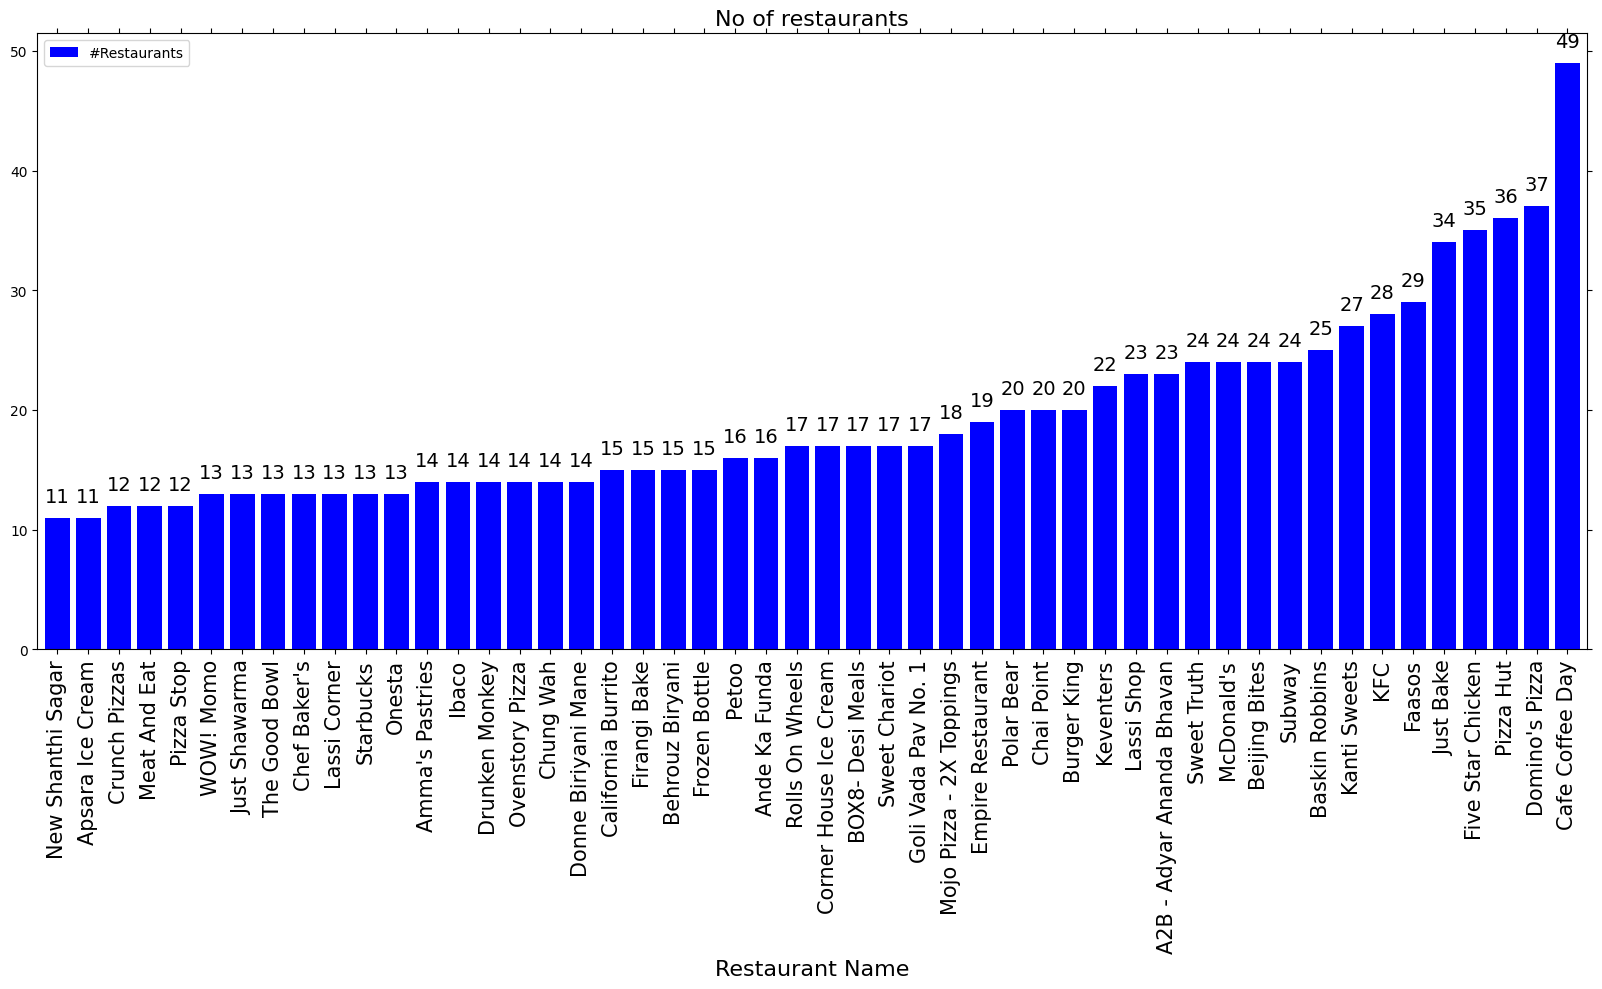

In [177]:
ax = histo.plot(kind='bar', figsize=(20, 8), rot=90, width = 0.8, color=[ 'blue'])
rects = ax.patches
labels = list(histo)
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 1, label,
            ha='center', va='bottom', fontsize=14)
ax.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on') # remove borders
ax.xaxis.set_tick_params(labelsize=15) # set xticks as 14
ax.legend(fontsize=14) # set legend sie as 14
ax.set_title('No of restaurants', fontsize=16) # set title and add font size as 16
ax.set_xlabel('Restaurant Name', fontsize=16)
#ax.grid(False)  # remove grid
ax.set_facecolor("white") # set bg color white
ax.legend(['#Restaurants'])

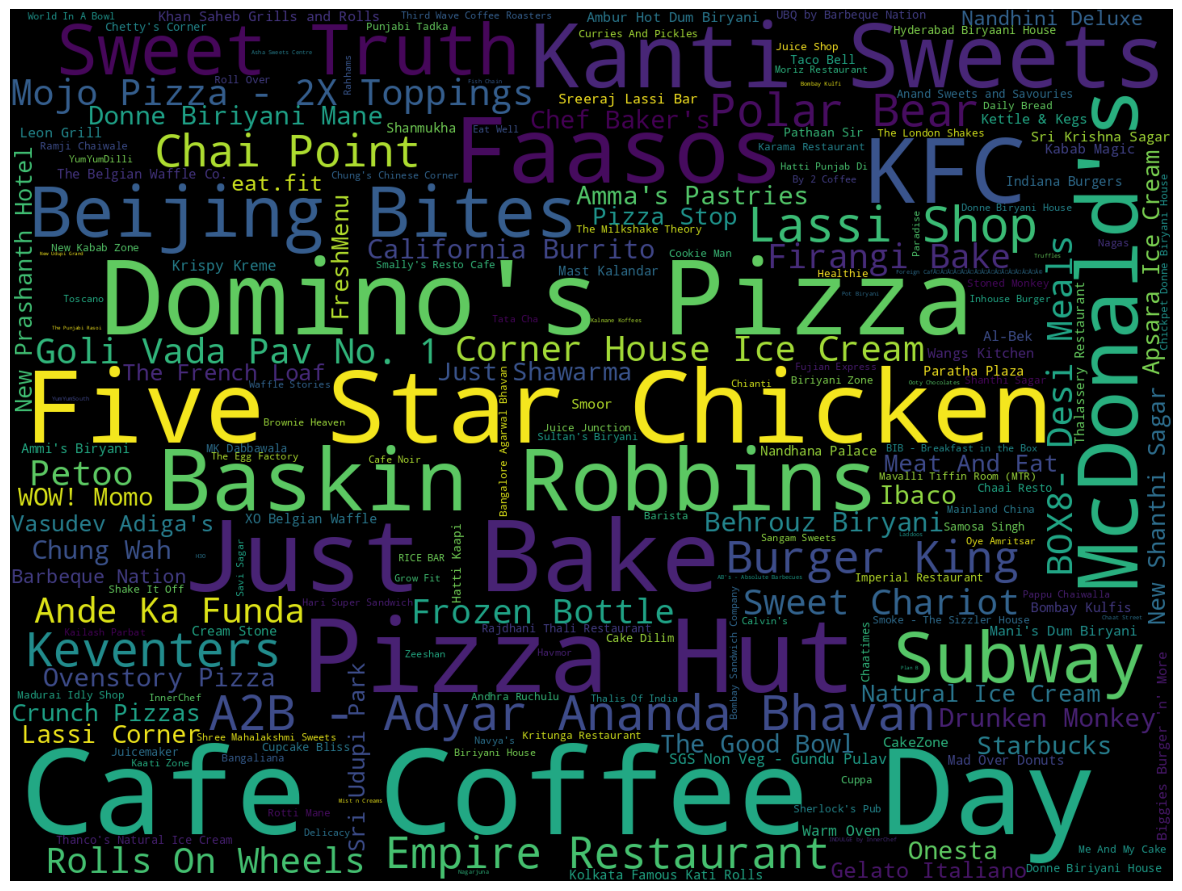

In [179]:
from subprocess import check_output
from wordcloud import WordCloud
wordcloud = (WordCloud(width=1440, height=1080, relative_scaling=0.5).generate_from_frequencies(rest_df['name'].value_counts()))


fig = plt.figure(1,figsize=(15, 15))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### Delivery and table book

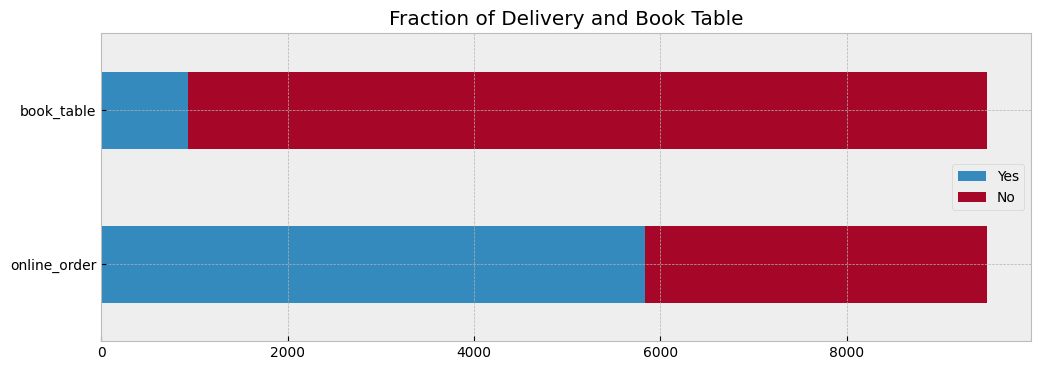

In [180]:
with plt.style.context('bmh', after_reset = True):
    plt.figure(figsize = (12,4))
    ax = plt.subplot(1,1,1)
    tmp = {}
    for col in ['online_order', 'book_table']: 
        tmp[col] = rest_df[col].value_counts()
    tmp = pd.DataFrame.from_dict(tmp, orient = 'index')
    tmp.plot.barh(stacked = True, ax = ax)
    ax.set_title('Fraction of Delivery and Book Table')
    plt.show()

## RATING AVG FOR EACH AREA

In [181]:
rest_df['rate'] = rest_df['rate'].str.split('/').str[0]

In [182]:
rest_df['rate'] = rest_df['rate'].astype('float')

<Figure size 1200x1000 with 0 Axes>

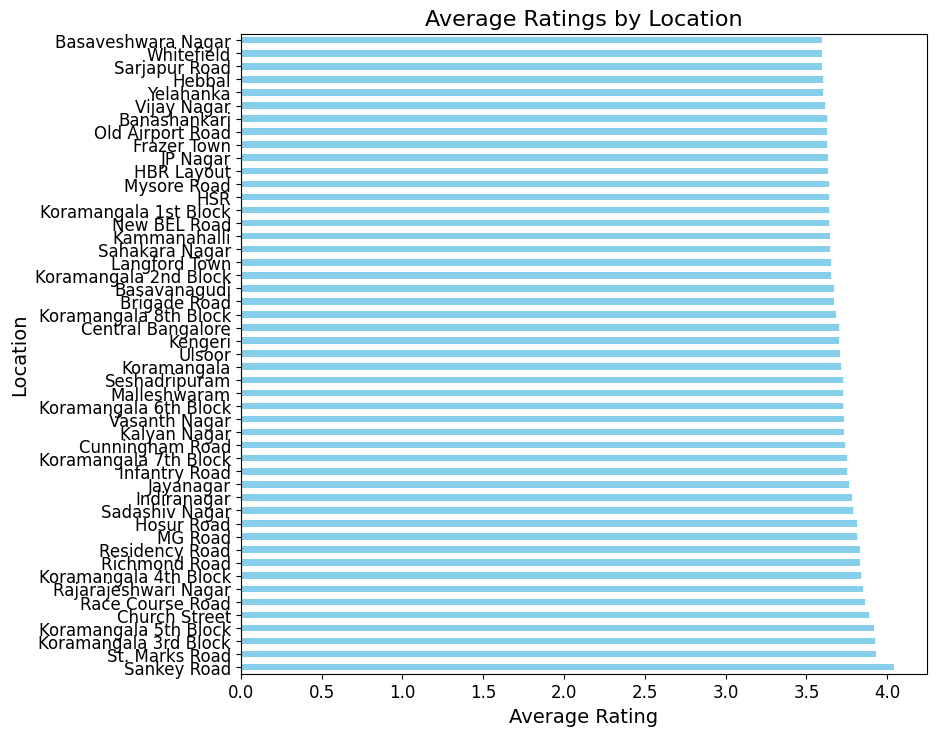

In [185]:
# Group by 'location' and calculate mean of 'rate'
avg_ratings = rest_df.groupby('location')['rate'].mean()

# Sort values in ascending order and select top 50 (excluding last one)
avg_ratings = avg_ratings.sort_values().iloc[-50:-1]

# Plotting
plt.figure(figsize=(12, 10))  # Larger figure size
fig, ax = plt.subplots(figsize=(10, 8))  # Creating subplots for better control

# Horizontal bar plot
avg_ratings.plot(kind='barh', color='skyblue', ax=ax)

# Plot customizations
ax.set_title('Average Ratings by Location', fontsize=16)
ax.set_xlabel('Average Rating', fontsize=14)
ax.set_ylabel('Location', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.invert_yaxis()  # Invert y-axis to display highest ratings on top
plt.tight_layout(pad=3.0)  # Increase padding between plot elements

plt.show()

## NUMBER OF RESTURANT IN EACH LOCALITY

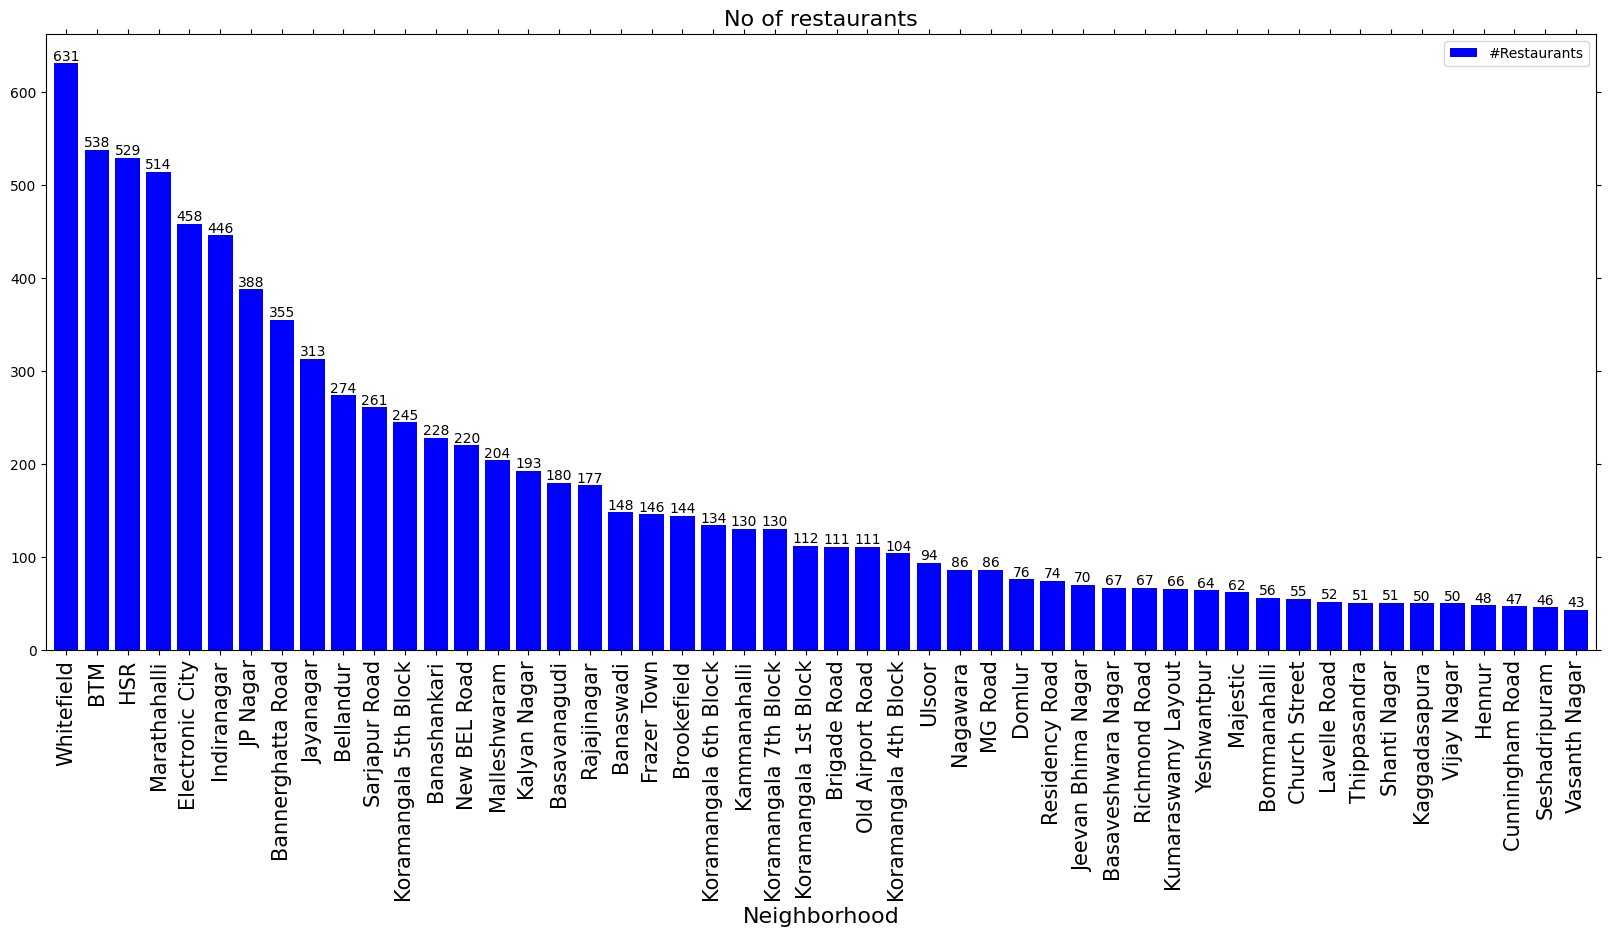

In [186]:
histo = rest_df.groupby('location')['url'].count().sort_values(ascending=False)[:50]
ax = histo.plot(kind='bar', figsize=(20, 8), rot=90, width = 0.8, color=[ 'blue'])
rects = ax.patches
labels = list(histo)
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + .05, label,
            ha='center', va='bottom', fontsize=10)
ax.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on') # remove borders
ax.xaxis.set_tick_params(labelsize=15) # set xticks as 14
ax.legend(fontsize=14) # set legend sie as 14
ax.set_title('No of restaurants', fontsize=16) # set title and add font size as 16
ax.set_xlabel('Neighborhood', fontsize=16)
#ax.grid(False)  # remove grid
ax.set_facecolor("white") # set bg color white
ax.legend(['#Restaurants'])

## PRESENCE OF ZOMATO ACROSS BANGLORE

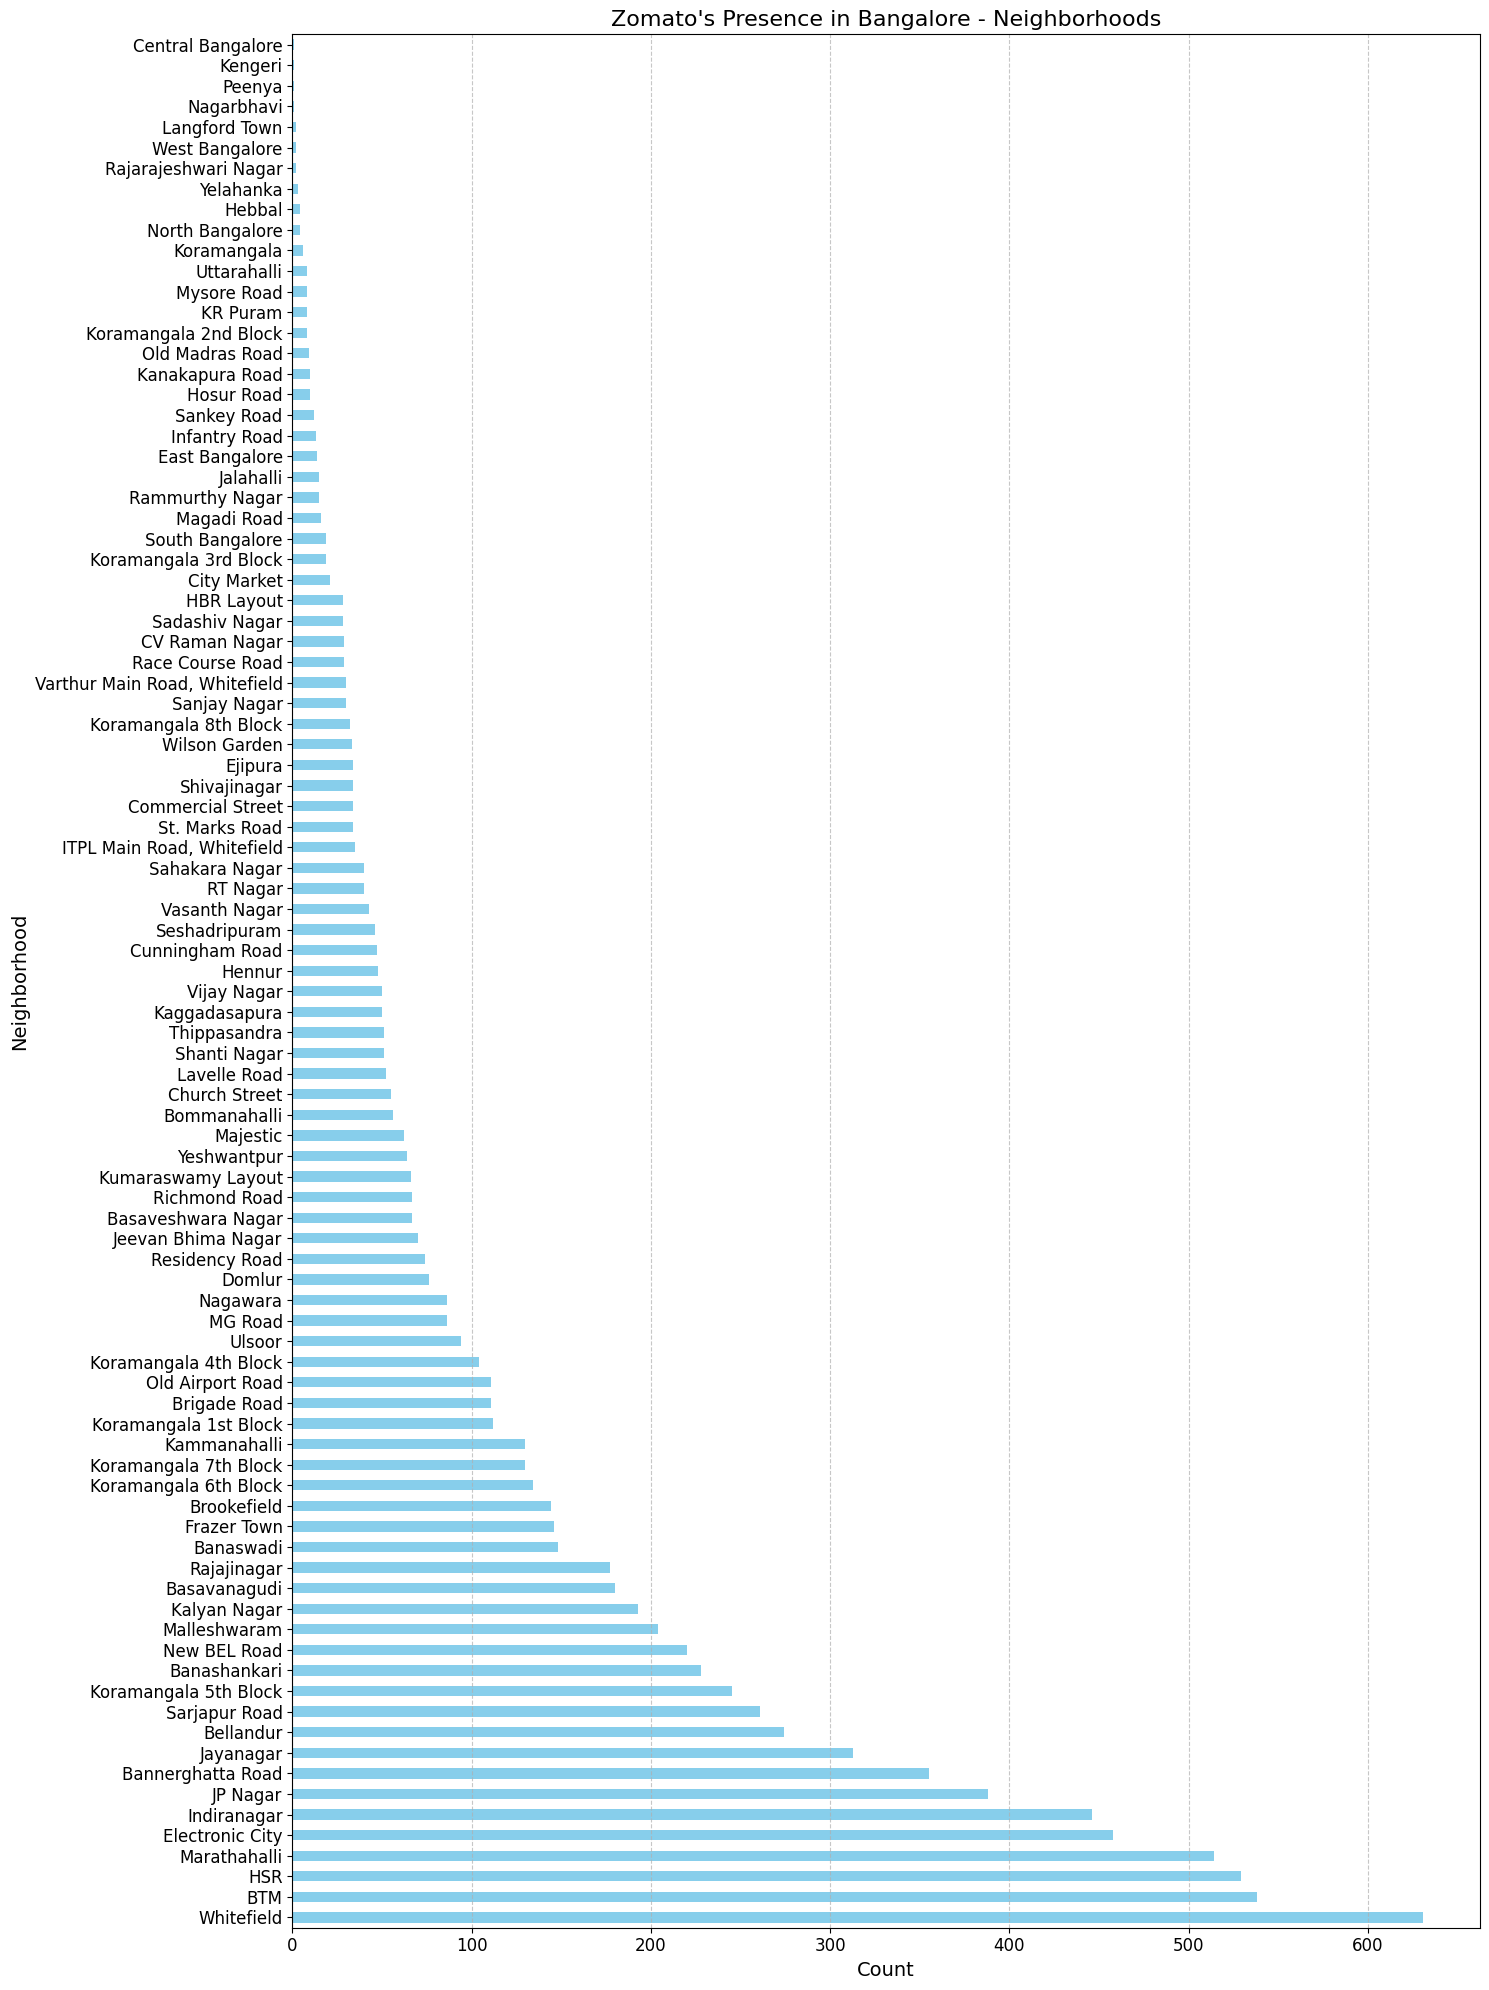

In [192]:
neighborhood_counts = rest_df['location'].value_counts()

# Plotting the horizontal bar plot
plt.figure(figsize=(15, 20))
neighborhood_counts.sort_values().plot(kind='barh', color='skyblue')  # Sort values for ascending order
plt.title("Zomato's Presence in Bangalore - Neighborhoods", fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Neighborhood', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Grid on x-axis for readability

plt.gca().invert_yaxis()  # Invert y-axis to have highest count at the top

plt.tight_layout()
plt.show()

In [208]:
rest_df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[(Rated 4.0, RATED\n A beautiful place to din...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[(Rated 4.0, RATED\n Had been here for dinner...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[(Rated 3.0, RATED\n Ambience is not that goo...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[(Rated 4.0, RATED\n Great food and proper Ka...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[(Rated 4.0, RATED\n Very good restaurant in ...",[],Buffet,Banashankari


In [219]:
location = [x for x in rest_df['location'].unique().tolist() if type(x) == str]
latitude = []
longitude =  []
for i in range(0, len(location)):
    if(type(location[i]) == str):
        ctr=0
        while True:
            try:
                address = location[i] + ', Bengaluru, India'
                geolocator = Nominatim(user_agent="ny_explorer")
                loc = geolocator.geocode(address)
                latitude.append(loc.latitude)
                longitude.append(loc.longitude)
                print('The geograpical coordinate of location are {}, {}.'.format(loc.latitude, loc.longitude))
            except:
                ctr+=1
                if(ctr==7):
                    print(i)
                    latitude.append(0)
                    longitude.append(0)
                    break
                continue
            break

The geograpical coordinate of location are 12.9393328, 77.5539819.
The geograpical coordinate of location are 12.9417261, 77.5755021.
The geograpical coordinate of location are 12.9603811, 77.5570091.
The geograpical coordinate of location are 12.9418488, 77.5868976.
The geograpical coordinate of location are 12.9067683, 77.5595021.
The geograpical coordinate of location are 12.9274413, 77.5155224.
The geograpical coordinate of location are 12.9660722, 77.6125940647638.
The geograpical coordinate of location are 12.9039566, 77.5096235.
The geograpical coordinate of location are 12.9096941, 77.5866067.
The geograpical coordinate of location are 12.864107149999999, 77.55441638924378.
The geograpical coordinate of location are 12.965717999999999, 77.5762705372058.
The geograpical coordinate of location are 12.9366292, 77.6014714.
The geograpical coordinate of location are 12.911275849999999, 77.60456543431182.
The geograpical coordinate of location are 12.9368751, 77.5753517.
The geograpi

In [221]:
rest_df['location_latitude'] = rest_df['location'].map(dict(zip(location, latitude)))
rest_df['location_longitude'] = rest_df['location'].map(dict(zip(location, longitude)))

In [222]:
rest_df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),location_latitude,location_longitude
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[(Rated 4.0, RATED\n A beautiful place to din...",[],Buffet,Banashankari,12.939333,77.553982
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[(Rated 4.0, RATED\n Had been here for dinner...",[],Buffet,Banashankari,12.939333,77.553982
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[(Rated 3.0, RATED\n Ambience is not that goo...",[],Buffet,Banashankari,12.939333,77.553982
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[(Rated 4.0, RATED\n Great food and proper Ka...",[],Buffet,Banashankari,12.939333,77.553982
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[(Rated 4.0, RATED\n Very good restaurant in ...",[],Buffet,Banashankari,12.941726,77.575502


In [249]:
dataframe_filtered = rest_df.groupby(['location'])[['location_latitude', 'location_longitude']].first()
dataframe_filtered['no_restaurant'] = rest_df.groupby(['location'])['url'].count()
venues_map = folium.Map(location=[12.934533, 77.626579], zoom_start=11) # generate map centred around Bengaluru

states = folium.map.FeatureGroup()
i=0
for lat, lng, in zip(dataframe_filtered.location_latitude, dataframe_filtered.location_longitude):
    states.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6,
        )
    )
    i+=1
i=0
for lat, lng, in zip(dataframe_filtered.location_latitude, dataframe_filtered.location_longitude):
    states.add_child(
        folium.features.Marker(
            [lat, lng],
            popup= dataframe_filtered.index[i],
        )
    )
    i+=1
# add incidents to map
venues_map.add_child(states)
venues_map.save('bangalore_rest_map.html')
venues_map

It can be seen clearly that outer cities of Bengaluru has most number of restaurants. But wait is that true ?
Analysing the data we found that central bengaluru is densely populated while there aren't much markers at the outer part of the city

In [235]:
nb_rate_df = rest_df.groupby(['location'])[['location_latitude', 'location_longitude']].first()
nb_rate_df['rate'] = rest_df.groupby(['location'])['rate'].mean()


,location_latitude,location_longitude,rate
location,,,
BTM,12.911276,77.604565,3.557621
Banashankari,12.939333,77.553982,3.624123
Banaswadi,13.014162,77.651854,3.478378
Bannerghatta Road,12.936629,77.601471,3.474648
Basavanagudi,12.941726,77.575502,3.668333
...,...,...,...
West Bangalore,13.009476,77.553089,3.400000
Whitefield,12.969637,77.749745,3.596197
Wilson Garden,12.948934,77.596827,3.445455


In [238]:
nb_rate_df['location'] = rest_df['location']

In [239]:
nb_rate_df.columns

Index(['location_latitude', 'location_longitude', 'rate', 'location'], dtype='object')

In [248]:
venues_map = folium.Map(location=[12.934533, 77.626579], zoom_start=11)

# Create two feature groups for markers: rate > 3 in blue, rate < 3 in red
markers_rate_gt_3 = folium.map.FeatureGroup(name='Rate >= 4')
markers_rate_lt_3 = folium.map.FeatureGroup(name='Rate < 4')

# Add markers for each location based on their rate
for index, row in nb_rate_df.iterrows():
    location = (row['location_latitude'], row['location_longitude'])
    popup_text = f"{row['location']} (Rating: {row['rate']:.1f})"

    if row['rate'] >= 3.6:
        markers_rate_gt_3.add_child(
            folium.Marker(location=location, popup=popup_text, icon=folium.Icon(color='blue'))
        )
    else:
        markers_rate_lt_3.add_child(
            folium.Marker(location=location, popup=popup_text, icon=folium.Icon(color='red'))
        )

# Add the feature groups to the map
venues_map.add_child(markers_rate_gt_3)
venues_map.add_child(markers_rate_lt_3)

# Add layer control to toggle between markers
folium.LayerControl().add_to(venues_map)

# Display the map

venues_map.save('bangalore_ratings_map.html')
venues_map

## LOCATION BASED ON COST OF FOOD

In [250]:
rest_df['approx_cost(for two people)'] = rest_df['approx_cost(for two people)'].str.replace(",","").astype(float)

In [251]:
above_50 = rest_df.groupby('location')['url'].count()[rest_df.groupby('location')['url'].count() >= 50].index

In [252]:
rest_df[rest_df['location'].isin(above_50)].groupby('location')['approx_cost(for two people)'].mean().sort_values(ascending= False)

location
Lavelle Road             1379.807692
MG Road                  1141.860465
Residency Road           1001.351351
Richmond Road             905.970149
Church Street             768.181818
Ulsoor                    745.212766
Old Airport Road          728.545455
Koramangala 4th Block     652.403846
Brigade Road              642.612613
Indiranagar               638.303167
Whitefield                638.076312
Domlur                    619.866667
Koramangala 5th Block     596.694215
Kalyan Nagar              585.233161
Koramangala 6th Block     569.402985
Marathahalli              533.691406
Koramangala 7th Block     531.395349
Malleshwaram              524.117647
Electronic City           523.253275
Sarjapur Road             523.076923
Bellandur                 518.540146
New BEL Road              493.636364
Kammanahalli              490.000000
JP Nagar                  488.788660
Shanti Nagar              475.490196
Jayanagar                 470.926518
HSR                       468

In [254]:
nb_cost_df = rest_df.groupby(['location'])[['location_latitude', 'location_longitude']].first()
nb_cost_df['cost'] = rest_df.groupby(['location'])['approx_cost(for two people)'].mean()
nb_cost_df

,location_latitude,location_longitude,cost
location,,,
BTM,12.911276,77.604565,401.173184
Banashankari,12.939333,77.553982,409.649123
Banaswadi,13.014162,77.651854,420.486111
Bannerghatta Road,12.936629,77.601471,458.732394
Basavanagudi,12.941726,77.575502,353.055556
...,...,...,...
West Bangalore,13.009476,77.553089,475.000000
Whitefield,12.969637,77.749745,638.076312
Wilson Garden,12.948934,77.596827,368.181818


In [255]:
nb_cost_df['location'] = rest_df['location']

In [269]:
# Generate a map centered around Bengaluru
venues_map = folium.Map(location=[12.934533, 77.626579], zoom_start=11)

# Define color scheme for cost ranges
def get_color(cost, interval):
    if cost <= 100 + interval:
        return 'green'
    elif cost <= 200 + interval:
        return 'orange'
    elif cost <= 400 + interval:
        return 'red'
    elif cost <= 600+ interval:
        return 'purple'
    elif cost <= 800+ interval:
        return 'blue'
    elif cost <= 1000+ interval:
        return 'yellow'
    elif cost <= 1200+ interval:
        return 'cyan'
    elif cost <= 1400+ interval:
        return 'magenta'
    elif cost <= 1600 + interval:
        return 'lime'
    elif cost <= 1800+ interval:
        return 'pink'
    elif cost <= 2000+ interval:
        return 'black'
    else:
        return 'white'

interval = 150
# Add markers for each location based on their cost range
for index, row in nb_cost_df.iterrows():
    location = (row['location_latitude'], row['location_longitude'])
    popup_text = f"{row['location']} (Cost: {row['cost']:.0f})"

    folium.CircleMarker(
        location=location,
        radius=5,
        popup=popup_text,
        color=get_color(row['cost'], interval),
        fill=True,
        fill_color=get_color(row['cost'], interval),
        fill_opacity=0.7
    ).add_to(venues_map)

# Display the map
venues_map.save('bangalore_cost.html')
venues_map

## NORMAL DIST OF RATINGS

/tmp/ipykernel_33/3651593455.py:9: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




Text(0, 0.5, 'Number')

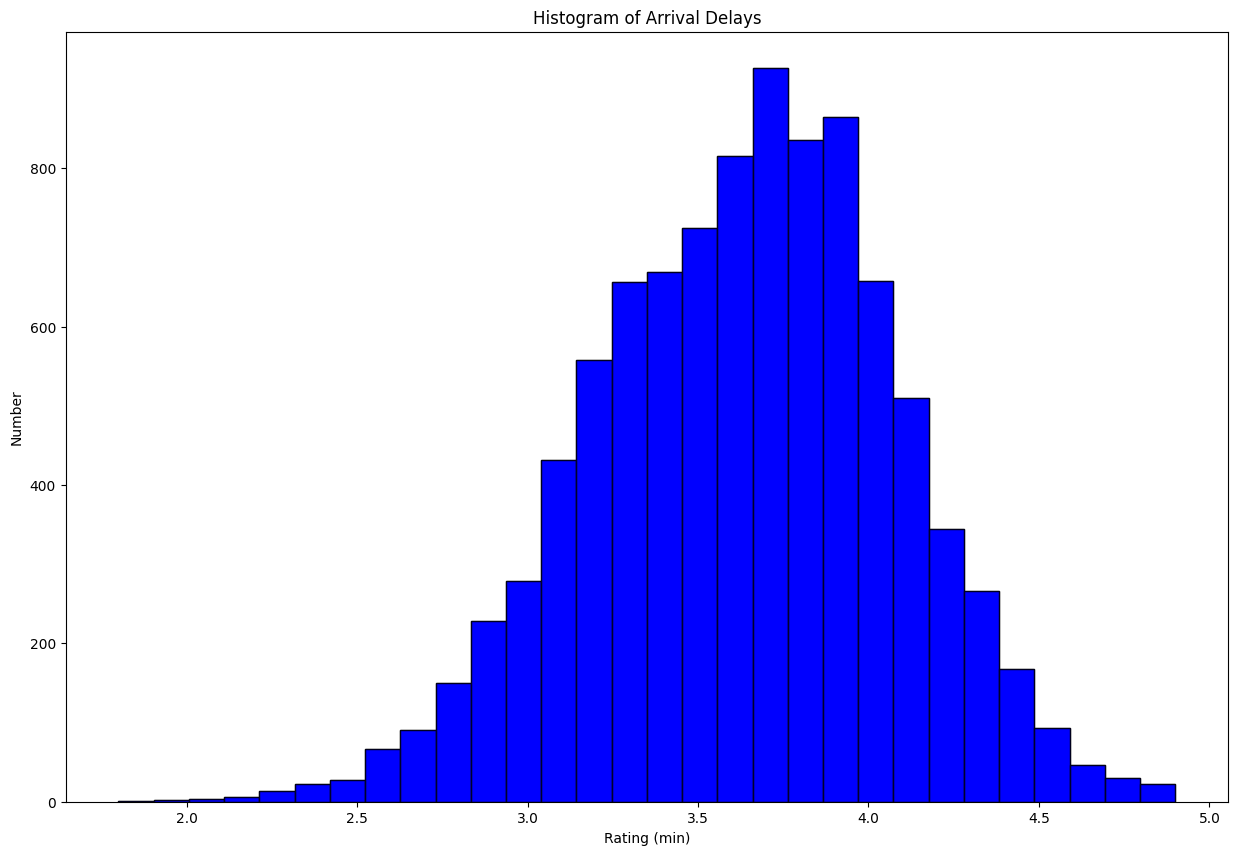

In [262]:
### Restaurant rating distibution
data = rest_df['rate'].dropna()
# matplotlib histogram
plt.figure(figsize=(15,10))
plt.hist(data, color = 'blue', edgecolor = 'black',
         bins = 30)

# seaborn histogram
sns.distplot(data, hist=True, kde=False 
             , color = 'blue',
             bins = 30,
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Histogram of Arrival Delays')
plt.xlabel('Rating (min)')
plt.ylabel('Number')

## RELATION BETWEEN PRICE RANGE AND RATING

In [263]:
# Now lets plot box plot based on the cost of food
bins = pd.IntervalIndex.from_tuples([(0, 500), (501, 1000), (1001, 2000), (2001, 3000), (3001, 4000), (4001, 5000), (5001, 6000)])
rest_df['cost_cat'] = pd.cut(rest_df['approx_cost(for two people)'], bins)

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



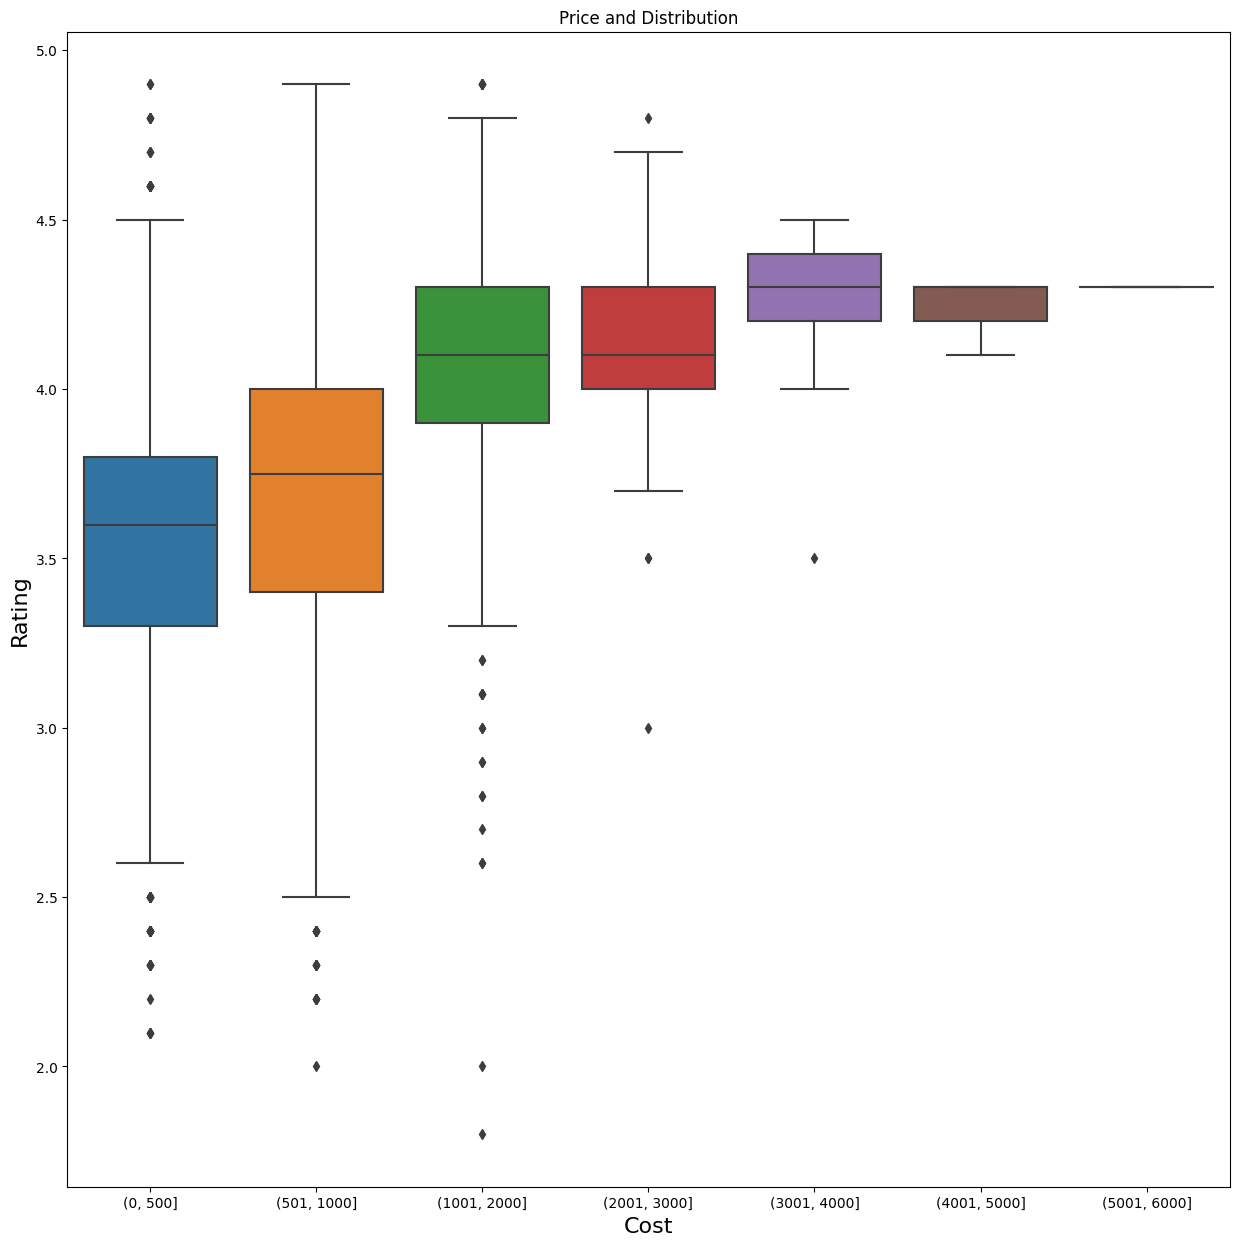

In [264]:
plt.figure(figsize=(15,15))
ax = sns.boxplot(x="cost_cat", y="rate", data=rest_df)
ax.set_xlabel('Cost', fontsize=16)
ax.set_ylabel('Rating', fontsize=16)
ax.set_title('Price and Distribution')
plt.savefig("box.png")
rest_df.drop('cost_cat', axis=1, inplace=True)